In [1]:
# Campo em Copacabana - dia 29/09/2024
# Sensores: Boia e RBR
# Objetivo: Processamento dos dados de ondas com a boia (conversao de acc p heave)

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import ipympl
import numpy as np
from scipy.stats import norm
from importlib import reload
sys.path.append('../ocean-wave')
import waveproc
reload(waveproc);

In [32]:
pth = '/mnt/c/Users/henri/OneDrive - atmosmarine.com/boia_oceanpact/dados/teste_copacabana_20240929/RBR/'
fln = '055161_20240929_1733.xlsx'

df = pd.read_excel(pth + fln, sheet_name='Bursts', header=1)
df.index = pd.to_datetime(df.Time, format="%Y-%m-%d %H:%M:%S.%f")
df.index.name = 'time'
df.Wave = df.Wave.astype('float16')

/mnt/c/Users/henri/git/venv/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [51]:
df

,Time,Burst,Pressure,Wave
time,,,,
2024-09-29 13:30:00.000,2024-09-29 13:30:00.000,1,10.234015,-0.000003
2024-09-29 13:30:00.500,2024-09-29 13:30:00.500,1,10.234227,0.000003
2024-09-29 13:30:01.000,2024-09-29 13:30:01.000,1,10.234262,-0.000006
2024-09-29 13:30:01.500,2024-09-29 13:30:01.500,1,10.234090,-0.000005
2024-09-29 13:30:02.000,2024-09-29 13:30:02.000,1,10.234145,-0.000017
...,...,...,...,...
2024-09-29 17:33:51.500,2024-09-29 17:33:51.500,13,10.265174,0.000000
2024-09-29 17:33:52.000,2024-09-29 17:33:52.000,13,10.265063,0.000000
2024-09-29 17:33:52.500,2024-09-29 17:33:52.500,13,10.265179,0.000000


In [90]:
# leitura dos dados da boia

pth = '/mnt/c/Users/henri/OneDrive - atmosmarine.com/boia_oceanpact/dados/teste_copacabana_20240929/GX4/'
fln = '3dm-gx4-25 - Output.csv'

boia = pd.read_csv(pth + fln)

data_boia = '2024-09-29'
boia.index = pd.to_datetime(data_boia + ' ' + boia['Timestamp'].astype(str))
boia.drop('Timestamp', axis=1, inplace=True)
# boia = boia.astype(float)

In [92]:
boia.head(3)

,estLinearAccelX,estLinearAccelY,estLinearAccelZ,estRoll,estPitch,estYaw
Timestamp,,,,,,
2024-09-29 14:33:15.486357,-13.027,26.233,2.138,-92.031,25.925,-2.232.731
2024-09-29 14:33:15.498933,-32.251,4.553,-124.407,-9.204,25.916,-2.232.683
2024-09-29 14:33:15.509896,-53.121,23.044,120.696,-92.048,25.909,-223.265


Text(0, 0.5, 'Acc.Z')

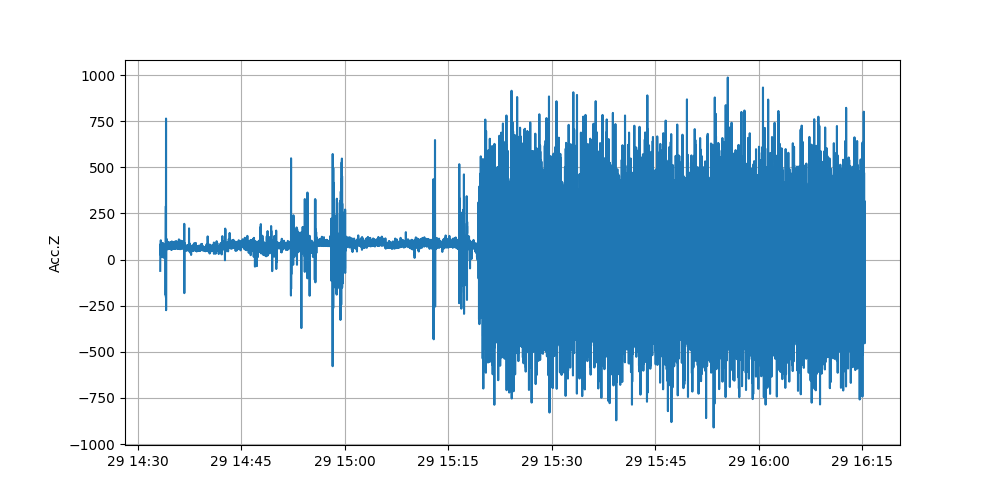

In [159]:

boia['x'] = pd.to_numeric(boia.estLinearAccelX, errors='coerce')
boia['y'] = pd.to_numeric(boia.estLinearAccelY, errors='coerce')
boia['z'] = pd.to_numeric(boia.estLinearAccelZ, errors='coerce')

# reamostra a cada 0.5 segundos

boia[['x', 'y', 'z']] = boia[['x', 'y', 'z']].interpolate()#.resample('1s').mean()

a = boia[['z']].resample('0.5s').mean()

# %matplotlib inline
%matplotlib widget

plt.close('all')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(a.z)
ax.grid()
ax.set_ylabel('Acc.Z')

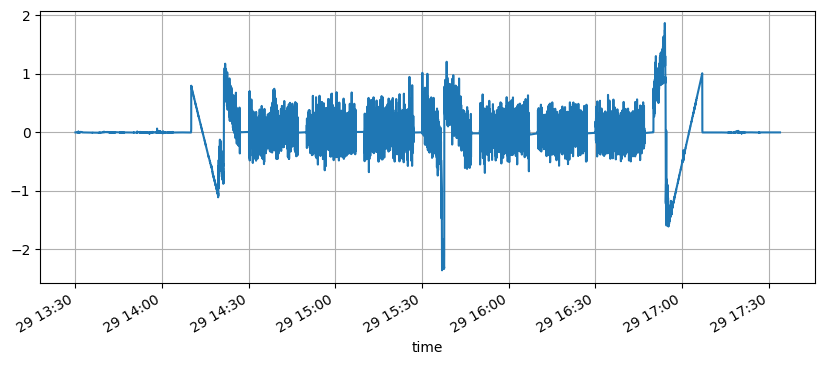

In [158]:
%matplotlib inline

df.Wave.plot(grid='on', figsize=(10, 4))

plt.show()

In [170]:
df.loc[df.Burst == 8]

,Time,Burst,Pressure,Wave,datetime
time,,,,,
2024-09-29 15:50:00.000,2024-09-29 15:50:00.000,8,13.846786,-0.016266,NaT
2024-09-29 15:50:00.500,2024-09-29 15:50:00.500,8,13.779226,0.025818,NaT
2024-09-29 15:50:01.000,2024-09-29 15:50:01.000,8,13.713418,0.036591,NaT
2024-09-29 15:50:01.500,2024-09-29 15:50:01.500,8,13.660406,0.004128,NaT
2024-09-29 15:50:02.000,2024-09-29 15:50:02.000,8,13.613197,-0.031860,NaT
...,...,...,...,...,...
2024-09-29 16:07:01.500,2024-09-29 16:07:01.500,8,13.521030,0.002831,NaT
2024-09-29 16:07:02.000,2024-09-29 16:07:02.000,8,13.614986,0.039307,NaT
2024-09-29 16:07:02.500,2024-09-29 16:07:02.500,8,13.691694,0.028458,NaT


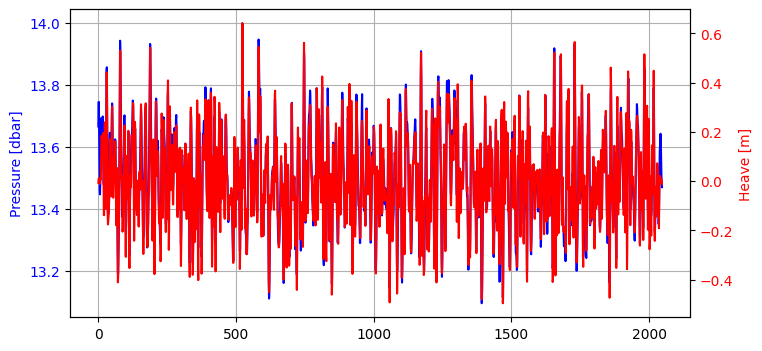

In [33]:
# %matplotlib widget
%matplotlib inline
# plt.close('all')


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.loc[df.Burst == bb].Pressure.values, color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_ylabel('Pressure [dbar]', color='b')
ax.grid()

ax1 = ax.twinx()
ax1.plot(df.loc[df.Burst == bb].Wave.values, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylabel('Heave [m]', color='red')

plt.show()
# plt.xlim(0, 200)

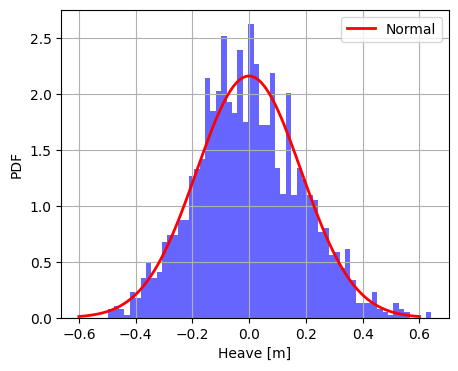

In [34]:

# Plotar o histograma
fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(h, bins=60, density=True, alpha=0.6, color='b')  # 'density=True' normaliza o histograma
# ax.set_xlim(-0.6, 0.6)
ax.grid()

# Calcular média e desvio padrão dos dados
mu, std = np.mean(h), np.std(h)

# Gerar a curva normal
x = np.linspace(-0.6, 0.6, 100)
p = norm.pdf(x, mu, std)

# Plotar a curva normal sobre o histograma
ax.plot(x, p, 'r', linewidth=2, label='Normal')
ax.set_xlabel('Heave [m]')
ax.set_ylabel('PDF')

ax.legend();

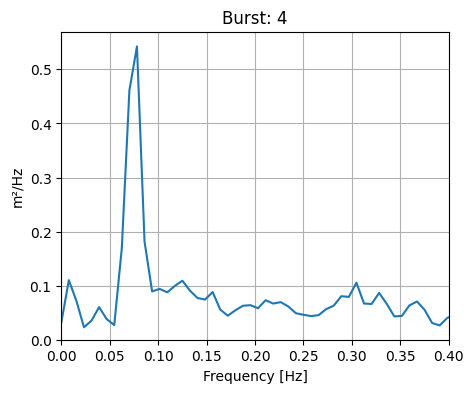

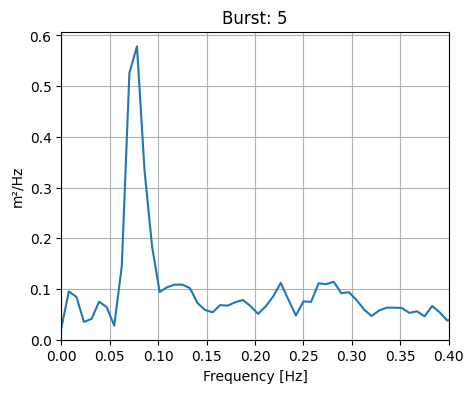

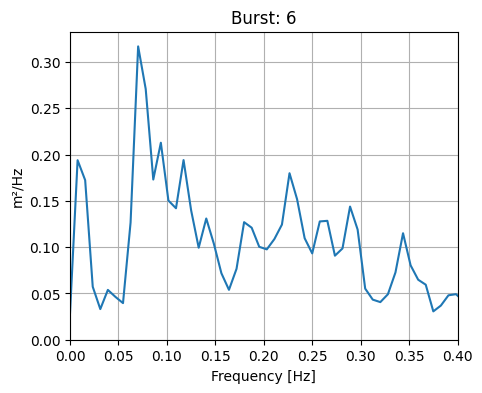

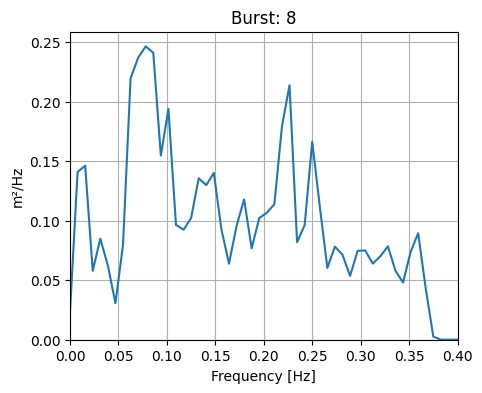

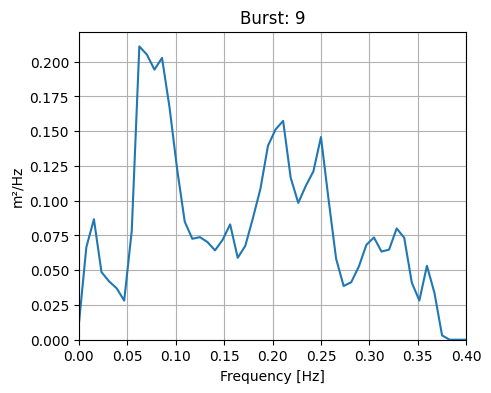

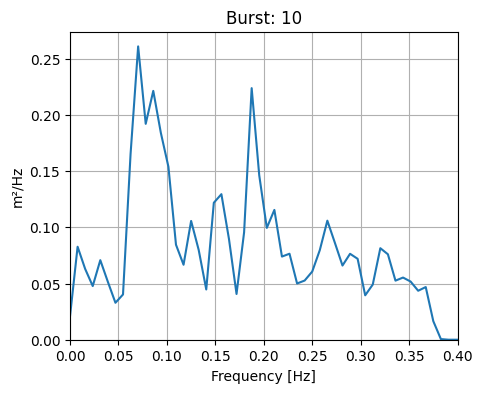

In [47]:
t = np.arange(0, len(h)*0.5, 0.5)

bb = [4, 5, 6, 8, 9, 10]

for b in bb:

    h = df.loc[df.Burst == b].Wave.values

    cc, pp, tt = waveproc.waveproc(t=t, s1=h, s2=[], s3=[], Fs=2.0, NFFT=128*2)

    fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(cc.c11)
    ax.set_title(f'Burst: {b}')
    ax.set_xlim(0, 0.4)
    ax.set_ylim(bottom=0)
    ax.set_ylabel('m²/Hz')
    ax.set_xlabel('Frequency [Hz]')
    ax.grid()


In [166]:
# seleciona serie da boia

hb = a.loc['2024-09-29 15:50:00.000':'2024-09-29 16:10:00.000'].iloc[:2048]
hb.head(2)

,z
Timestamp,
2024-09-29 15:50:00.000,177.175029
2024-09-29 15:50:00.500,-12.679585


<Axes: xlabel='Timestamp'>

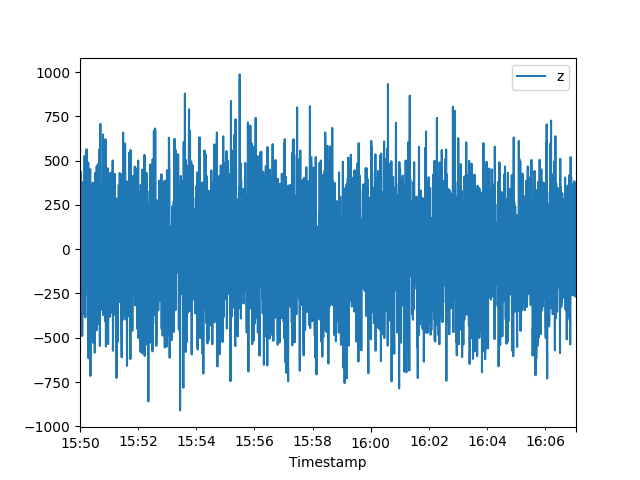

In [167]:
hb.plot()

In [171]:
hb

,z
Timestamp,
2024-09-29 15:50:00.000,177.175029
2024-09-29 15:50:00.500,-12.679585
2024-09-29 15:50:01.000,-80.971398
2024-09-29 15:50:01.500,-38.210250
2024-09-29 15:50:02.000,437.156500
...,...
2024-09-29 16:07:01.500,371.891857
2024-09-29 16:07:02.000,-109.368477
2024-09-29 16:07:02.500,-268.024357


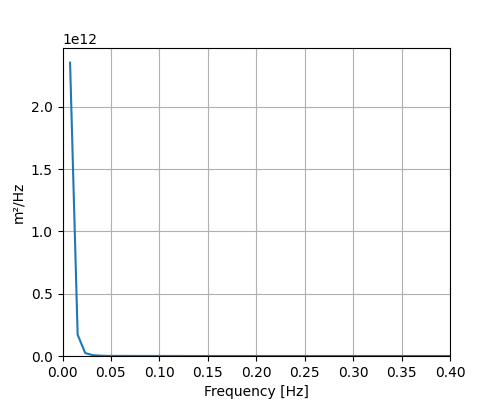

In [177]:
ccb, ppb, ttb = waveproc.waveproc(t=t, s1=hb.z.values, s2=[], s3=[], Fs=2.0, NFFT=128*2)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(ccb.c11 / (2*np.pi*ccb.index**4))
# ax.set_title(f'Burst: {b}')
ax.set_xlim(0, 0.4)
ax.set_ylim(bottom=0)
ax.set_ylabel('m²/Hz')
ax.set_xlabel('Frequency [Hz]')
ax.grid()